### CA1 – Machine Learning HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Machine-Learning)

## 1. Data Understanding

### 1.1 Importing libraries

Importing the required libraries "`pandas`" to start the project.

Also importing "`numpy`", "`seaborn`" and "`matplotlib.pyplot`", in case it needs other libraries it will be imported when necessary it comes.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

### 1.2	Loading Data from a CSV File

Loading the dataset using the function “`.read_csv`” to import the required data existing in the Comma-separated values "`.csv`" file in the `df` variable.

In [2]:
df = pd.read_csv("HPM04.20240416T220418.csv")

### 1.3	Inspecting the Data Set

The first command useful to start understanding the data is “`.head()`” to check the first 5 observations as default and features contained in the data frame after loaded. 

This command was important and necessary to get the first impression of it, returning that this dataset has **n** rows (observations) and **8** columns (features).

In [3]:
df.head(2)

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN


Thereafter using the command “`shape`” shows us the complete body of the data, in this case **23491** observations and **8** features to be analysed.

In [4]:
df.shape

(23491, 8)

Used “```.info()```” next to Print a concise summary of a DataFrame. Getting this information it was necessary to learn the names of features existing and the difference between the total of observations shown before in the “`shape`” command and their respective data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23491 entries, 0 to 23490
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Statistic Label   23491 non-null  object 
 1   Month             23491 non-null  object 
 2   Dwelling Status   23491 non-null  object 
 3   Eircode Output    23491 non-null  object 
 4   Stamp Duty Event  23491 non-null  object 
 5   Type of Buyer     23491 non-null  object 
 6   UNIT              23491 non-null  object 
 7   VALUE             20302 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


The "`.describe()`" function shows us a little more about each feature, we can see statistics information about: count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max 

In [6]:
df.describe()

,VALUE
count,2.030200e+04
mean,2.313803e+05
std,1.186008e+05
min,2.500000e+04
25%,1.481902e+05
50%,2.066660e+05
75%,2.900000e+05
max,1.350000e+06


Left a commented code below if wanted to see a good Profile Report about the data set itself with an overview, alert and reproduction of it, containing information about EDA, if there are or not missing cells, duplicated rows, variable types, Mean, Max, Min, Negative and Zero values, memory size and so on, graphics of the distribution, the command “pip install ydata-profiling” is required to use this.

In [7]:
# pip install ydata-profiling

In [8]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

### 1.4 Checking types of data

Using "`df.dtypes`" it is possible to get information on each feature and check their respective data types if are correct, make sense or not, comparing with the "`.head()`" command and the dictionary of the data.

In [9]:
df.dtypes

Statistic Label      object
Month                object
Dwelling Status      object
Eircode Output       object
Stamp Duty Event     object
Type of Buyer        object
UNIT                 object
VALUE               float64
dtype: object

After using "`.unique()`" for shows the unique content in the specific feature, and allow us to check if there are any divergence of the values.

In [10]:
df['Type of Buyer'].unique()

array(['Household Buyer - First-Time Buyer Owner-Occupier'], dtype=object)

## 2. Data Preparation

### 2.1 Finding Unique Values

Checking the name of the features using the command "`.columns`"

In [11]:
df.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

Used the method "`.value_counts()`" to "Return a Series containing the frequency of each distinct row in the Dataframe." (The Pandas Development Team, 2024b), it was helpful to use in classification features to understand better what it was going on.

In [12]:
df["UNIT"].value_counts()

UNIT
Euro    23491
Name: count, dtype: int64

Next using the command “`.isnull().sum()`” to get the amount of any missing values existent. In this case the features: In this case just the feature: `VALUE`

In [13]:
df.isnull().sum()

Statistic Label        0
Month                  0
Dwelling Status        0
Eircode Output         0
Stamp Duty Event       0
Type of Buyer          0
UNIT                   0
VALUE               3189
dtype: int64

Next getting the percentage of missing values using the method Mean. In this case, Values are missing approximately 14% of 100% values.

In [14]:
df.isnull().mean() * 100

Statistic Label      0.000000
Month                0.000000
Dwelling Status      0.000000
Eircode Output       0.000000
Stamp Duty Event     0.000000
Type of Buyer        0.000000
UNIT                 0.000000
VALUE               13.575412
dtype: float64

Below it was used in a matrix graphic imported from missingno library that shows us the features missing values

In [15]:
# pip install missingno

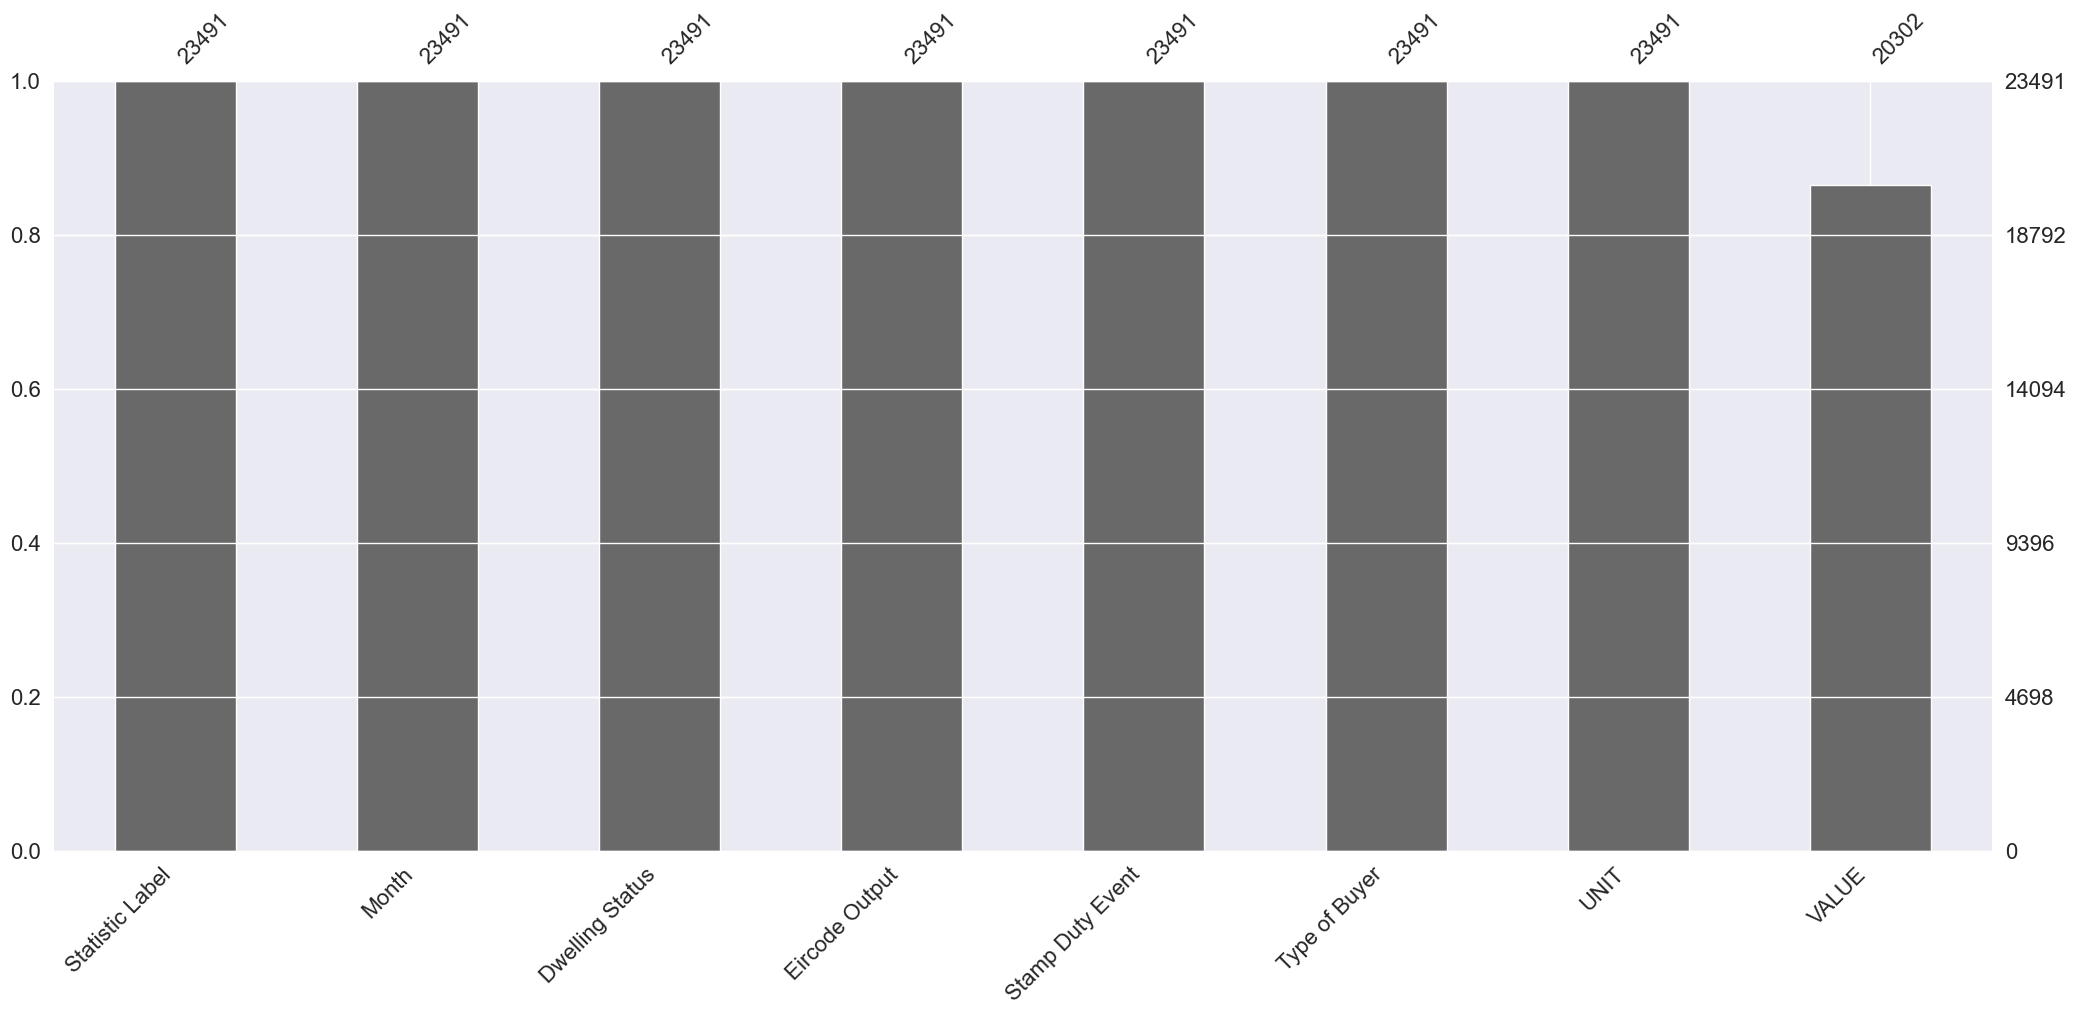

In [16]:
import missingno as msno
ax = msno.bar(df.sample(23491))

### 2.2 Replacing Values (Syntax errors)

Checking the data frame using "`.head()`"

In [17]:
df.head()

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
2,Mean Sale Price,2010 January,All Dwelling Statuses,A45: Oldtown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,322422.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,343425.0


Until now, it has not found any syntax error or divergence between the features, if needed will be dealt with.

The feature `Eircode Output` will be `split` into two parts when the algorithm finds the symbol `:` turn one feature the Acronym of the place and the second one County's name. Learned how to "Split strings around given separator/delimiter." (The Pandas Development Team, 2024c). 

Using the split of strings to divide into two columns the values in `Eircode Output` feature and saved in the news features whose names are "`Acronym`" and "`County`".

In [18]:
df[["Acronym", "County"]] = df['Eircode Output'].str.rsplit(":", n = 1, expand = True)

In [19]:
df.head(2)

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE,Acronym,County
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A41,Ballyboughal
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A42,Garristown


### 2.3 Dropping Irrelevant Columns

After analyses opted to delete the features: 'Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer' and 'UNIT'.

In [20]:
df.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE', 'Acronym',
       'County'],
      dtype='object')

In [21]:
df = df.drop(columns = ['Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer', 'UNIT'])

In [22]:
df.head(2)

,Month,Eircode Output,VALUE,Acronym,County
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal
1,2010 January,A42: Garristown,NaN,A42,Garristown


### 2.4 Renaming Columns

Renaming the features: Eircode Output to Eircode and VALUE to Value

In [23]:
df.columns

Index(['Month', 'Eircode Output', 'VALUE', 'Acronym', 'County'], dtype='object')

In [24]:
df = df.rename(columns= {'Eircode Output': 'Eircode', 'VALUE': 'Value'})

In [25]:
df.head(2)

,Month,Eircode,Value,Acronym,County
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal
1,2010 January,A42: Garristown,NaN,A42,Garristown


### 2.5 Handling Missing Values

Creating a variable whose name is "`missing_value_formats`" to save some different characters and input in the dataset to patronize all of them as NaN to be easy to handle next.  

In [26]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--", "-", "?", "UnKnown", "Unknown", "Na", "Nan"]
df.replace(missing_value_formats, np.nan, inplace = True)

Using the function `.isna()` from `pandas.DataFrame.isna` to "Return a boolean same-sized object indicating if the values are NA." (The Pandas Development Team, 2024a) and next using shape in `.isna()` and `df`

In [27]:
df[df['Value'].isna()]

,Month,Eircode,Value,Acronym,County
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal
1,2010 January,A42: Garristown,NaN,A42,Garristown
2,2010 January,A45: Oldtown,NaN,A45,Oldtown
10,2010 January,A85: Dunshaughlin,NaN,A85,Dunshaughlin
27,2010 January,D10: Dublin 10,NaN,D10,Dublin 10
...,...,...,...,...,...
23451,2024 January,P75: Bantry,NaN,P75,Bantry
23455,2024 January,R21: Mhuine Bheag,NaN,R21,Mhuine Bheag
23471,2024 January,V23: Caherciveen,NaN,V23,Caherciveen
23484,2024 January,X42: Kilmacthomas,NaN,X42,Kilmacthomas


In [28]:
df[df['Value'].isna()].shape, df.shape

((3189, 5), (23491, 5))

There are 3189 observations missing values from the total 23491 with 13.57% of 100% 

In [29]:
print("Percentage of Missing Values in Value Feature: {}".format((3189/23491) * 100))

Percentage of Missing Values in Value Feature: 13.575411859861223


### 2.6 Imputing Missing Values

It could have opted to use the code "`df = df.dropna(axis = 0)`" to drop all observations with missing values once there is not as much lost percentage, but in this case, it will use an approach such as getting the mean values, or median values, filling by the top or down and so on to imputing those missing values.

#### 2.6.1 Creating a Hypothesis from a New Column

Before to fill the missing values it will create another feature at the end of the data frame whose name will be `Sold`. 

Let's assume that there are no values in these observations because the properties were sold and after sold they can no longer present values as they are private data.

Opted to do this, once the data frame there are not many features to be analysed and used This new column will be used after in machine learning algorithms.

To finally get the results below it was necessary to learn two things: First, how to use if and else conditions with the `.apply()` class, learned how to use after reading "5 ways to apply an IF condition in Pandas DataFrame" (Data to Fish, 2024) from datatofish.com website, and second for the condition Pandas documentation, using `pandas.isnull` "Detect missing values for an array-like object" (The Pandas Development Team, 2024c).

In [30]:
df['Sold'] = df['Value'].apply(lambda x: 1 if pd.isna(x) else 0)

In [31]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal,1
1,2010 January,A42: Garristown,NaN,A42,Garristown,1
2,2010 January,A45: Oldtown,NaN,A45,Oldtown,1
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0


#### 2.6.2 Handling Missing Values

Next, in this case: `Value` feature will try to use the method .median() to fill in the NaN(s) value missing. 

After some analyses, it found that all missing values got the same value in Price, which is not expected so in this case, changed to the method `bfill` to get values from the next rows, where it works and even the distribution of the feature get better than before.

Opted to use the `bfill` approach event the Median approach, it is a better representation of the majority of the values in the variable, but not worked well in this case.

In [32]:
df['Value'] = df['Value'].fillna(df['Value'].fillna(method = 'bfill'))

In [33]:
df[df["Sold"] == 1]

,Month,Eircode,Value,Acronym,County,Sold
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1
10,2010 January,A85: Dunshaughlin,180355.0,A85,Dunshaughlin,1
27,2010 January,D10: Dublin 10,213067.0,D10,Dublin 10,1
...,...,...,...,...,...,...
23451,2024 January,P75: Bantry,187000.0,P75,Bantry,1
23455,2024 January,R21: Mhuine Bheag,274212.0,R21,Mhuine Bheag,1
23471,2024 January,V23: Caherciveen,310000.0,V23,Caherciveen,1
23484,2024 January,X42: Kilmacthomas,257835.0,X42,Kilmacthomas,1


In [34]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0


Checked once again if worked with a graphic and the command “`.isnull().sum()`”.

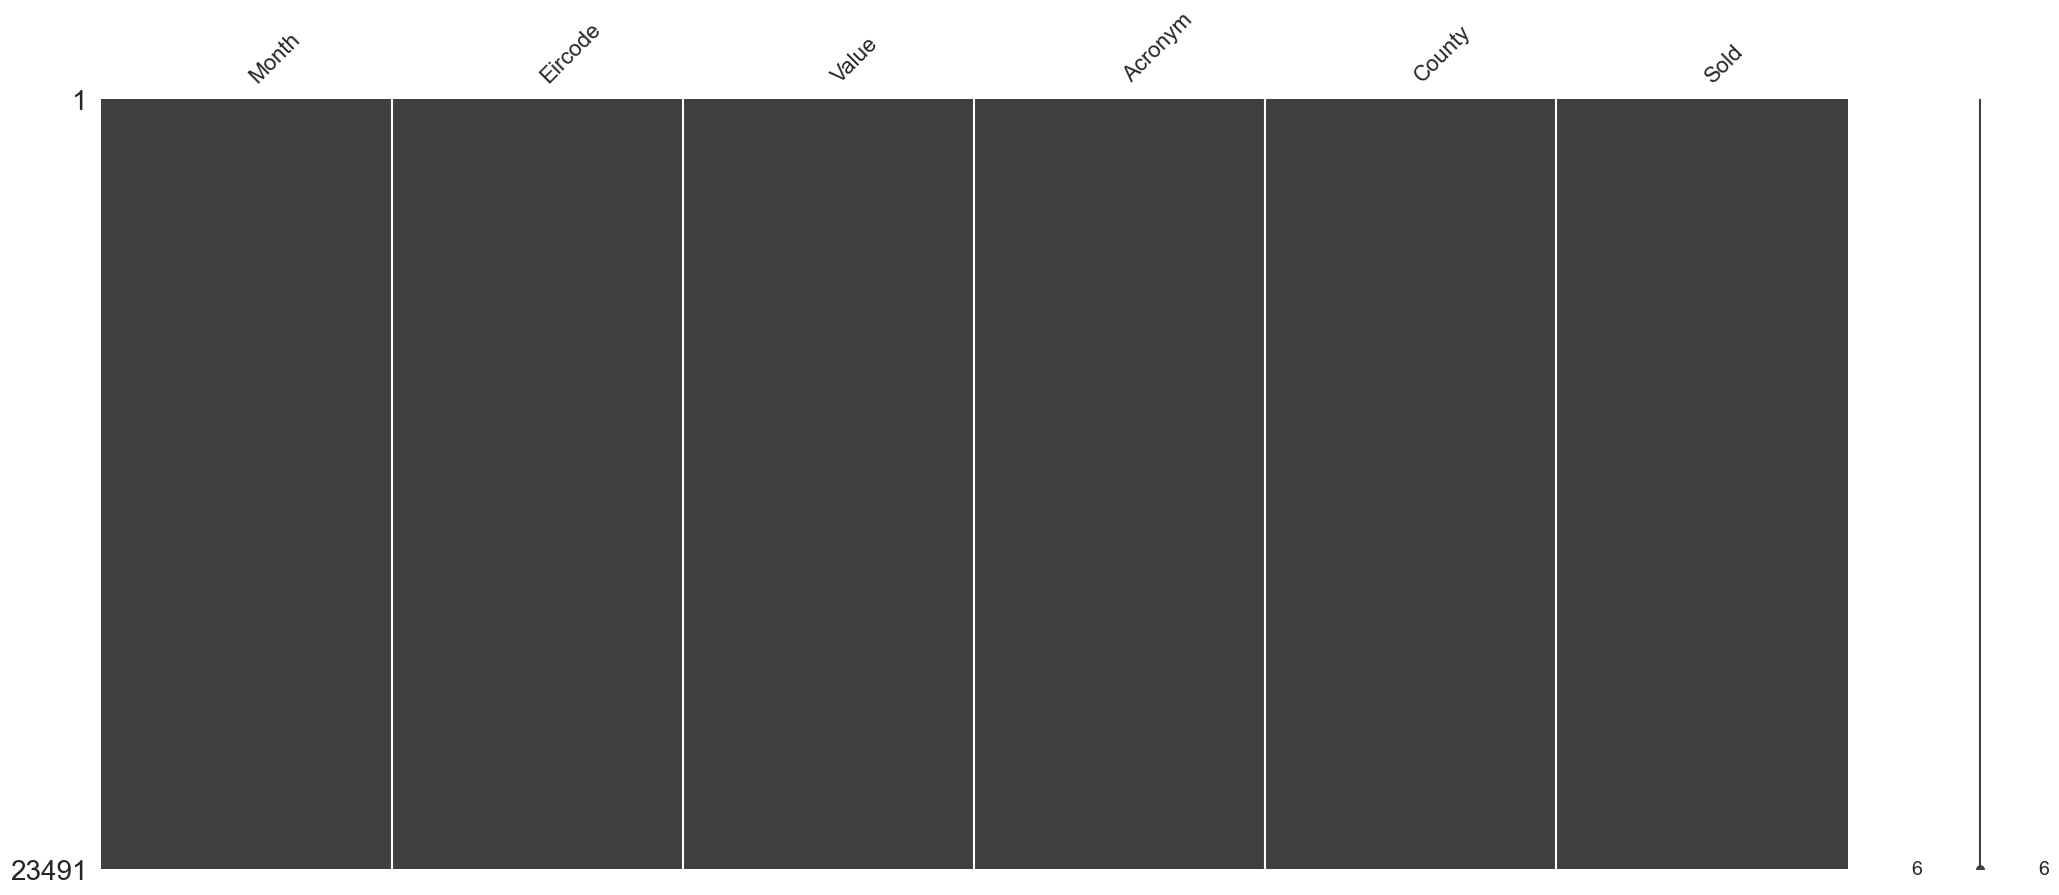

In [35]:
ax = msno.matrix(df.sample(23491))

In [36]:
df.isnull().sum()

Month      0
Eircode    0
Value      0
Acronym    0
County     0
Sold       0
dtype: int64

In [37]:
df[df['Value'].isnull()].head()

,Month,Eircode,Value,Acronym,County,Sold


### 2.7 Handling Duplicate Rows

Checked if there exist duplicate observations, in this case, there are none to be handled.

In [38]:
df[df.duplicated()].shape

(0, 6)

In [39]:
df.count()

Month      23491
Eircode    23491
Value      23491
Acronym    23491
County     23491
Sold       23491
dtype: int64

### 2.8 Type Conversion

Checking with `dtypes` all features to check the data types also seeing with `.head()`, and there are no features to be converted, but in case it is needed it will use the command “.astype()” to fix it.

In [40]:
df.dtypes

Month       object
Eircode     object
Value      float64
Acronym     object
County      object
Sold         int64
dtype: object

In [41]:
df.head(2)

,Month,Eircode,Value,Acronym,County,Sold
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1


### 2.9 Relationships

There are not many numerical features in the data set, but if had could be analysed the relationships between the numerical feature with the codes below, creating a new data frame whose name is "`df_numeric`" and getting just numeric columns from "`df`" data frame, after using the algorithm “`.corr`” in the "`df_numeric.corr()`" to save the correlations in a new variable "`correlation_matrix`" to show the correlation matrix and check the relations between them using a heatmap.

,Value,Sold
Value,1.000000,-0.090497
Sold,-0.090497,1.000000


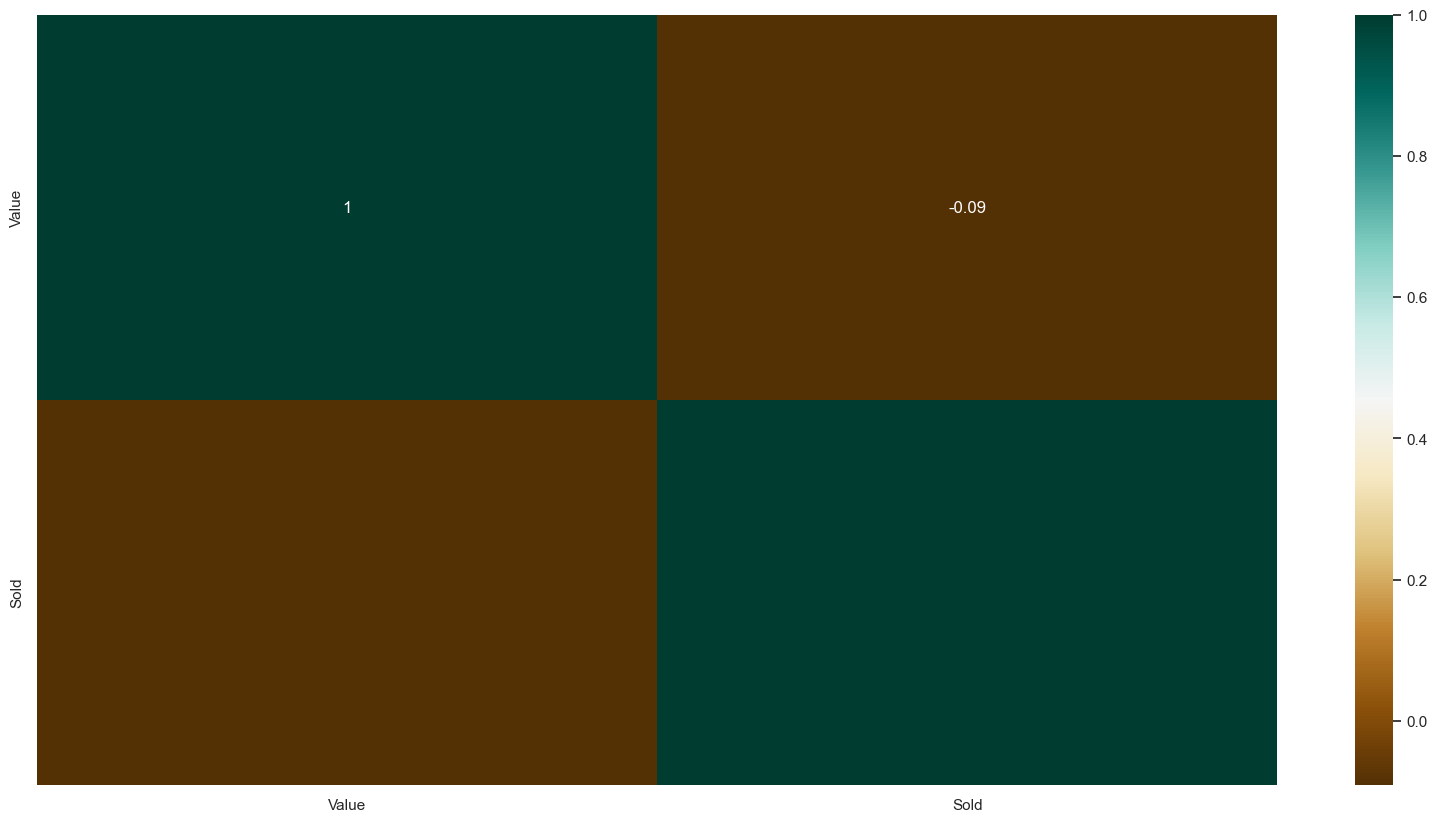

In [42]:
df_numeric = df.select_dtypes(include = ['number'])

plt.figure(figsize = (20, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

Below is an example of the density of Value feature using KDE plot.

<Axes: xlabel='Value', ylabel='Density'>

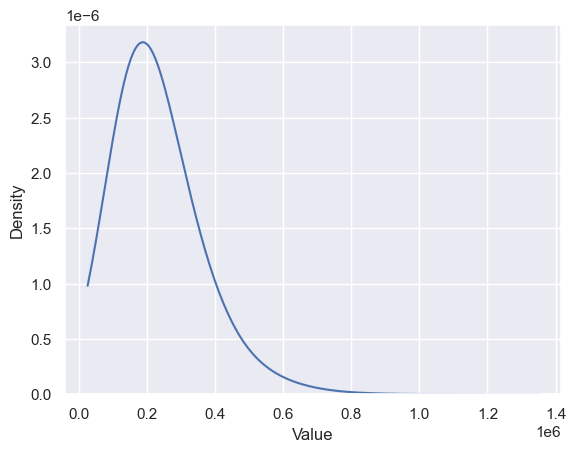

In [43]:
sns.kdeplot(data = df, x = "Value", bw_adjust = 5, cut = 0)

### 2.10 Statistical Analysis

As said before there are not many numerical features in the data set, but below there is an example to create a pair plot to visualise all the features and their respective signals.
In this case left just the feature `Value` to visualisation.

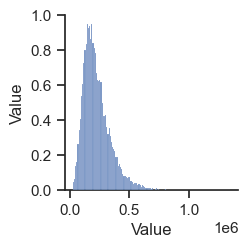

In [44]:
sns.set_theme(style = "ticks")
sns.pairplot(df[['Value']])

Next, it was created a histogram using the graphic “`.displot`” from the library seaborn to check the distribution of `Value` feature. 

The examples below will be refined with a mark to show us the mean and median on the graphic, the example got from the GitHub Gist using the command "`.axvline`" to get a "Distribution plot with mean and median" (Cereniyim, 2019), also checked about the parameters on matplotlib website for "Add a vertical line across the Axes" (The Matplotlib Development Team, 2024).

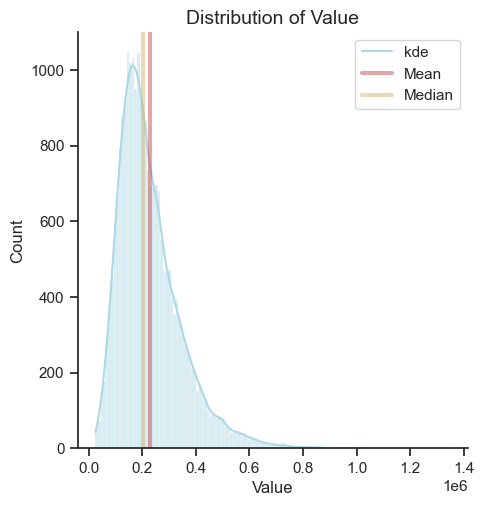

Mean: 227192.43, Median: 202125.00
Standard Deviation: 116763.18


In [45]:
sns.displot(df["Value"], color = "lightblue", kde = True)
plt.axvline(df["Value"].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
plt.axvline(df["Value"].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
plt.title("Distribution of Value", size = 14)
plt.legend(["kde", "Mean", "Median"])
plt.show()

print('Mean: {:.2f}, Median: {:.2f}'.format(df['Value'].mean(), df['Value'].median()))
print('Standard Deviation: {:.2f}'.format(df['Value'].std()))

**Distribution of Value:** 
The distribution is `skewed to the right side`, statistical values: Mean: **227192.43**, Median: **202125.00** and Standard Deviation: **116763.18**

Next, create a boxplot to check all features and their respective outliers.

<Axes: >

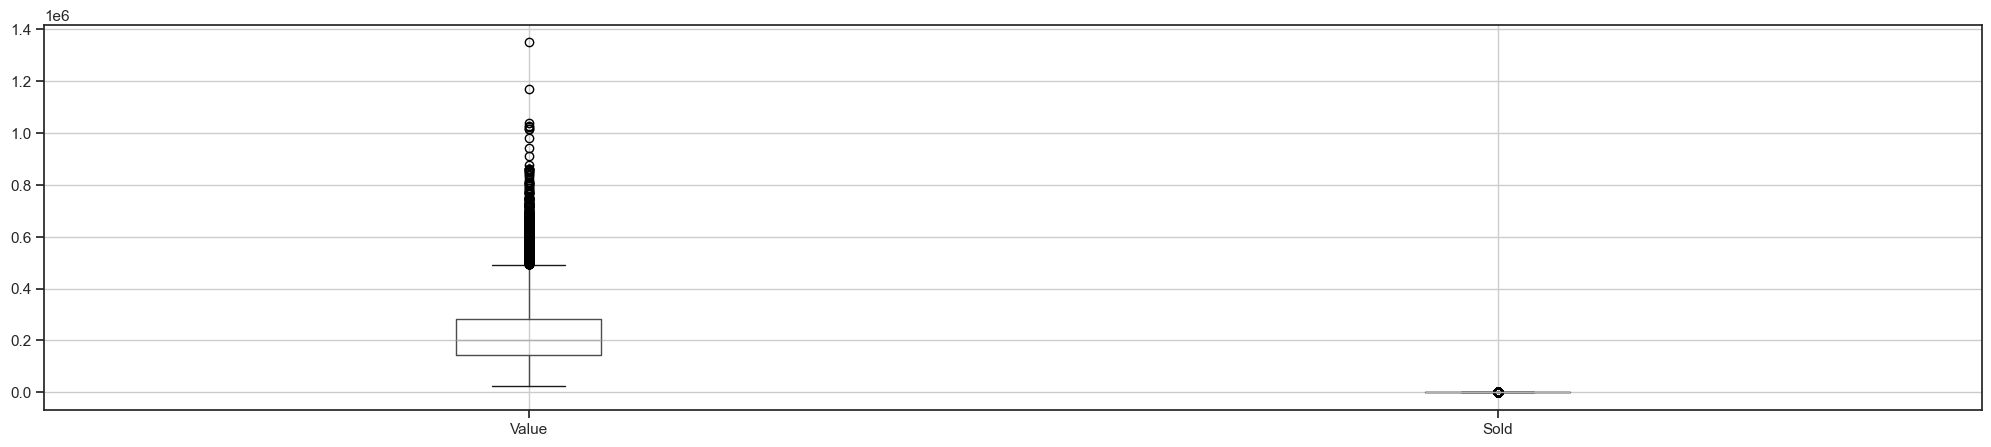

In [46]:
df.boxplot(figsize = (25, 5))

Below are created some code lines about statistics from the feature Value as a test and after using the “.describe” to check the values.

1. Mean: `numpy.mean` from numpy.org
2. Median: `numpy.median` from numpy.org
3. Mode: `pandas.DataFrame.mode` from pandas.pydata.org
4. Range: `numpy.max` minus `numpy.min` from numpy.org
5. Standard Deviation: `numpy.std` from numpy.org
6. Variance: `numpy.var` from numpy.org
7. Interquartile Range (IQR): `numpy.percentile` 75% - `numpy.percentile` 25% from numpy.org
8. Percentile 25%: `numpy.percentile`  from numpy.org
9. Percentile 50%: `numpy.percentile`  from numpy.org
10. Percentile 75%: `numpy.percentile`  from numpy.org
11. Coefficient of Variation (CV): `numpy.std` divided by `numpy.mean` multiple by 100 from numpy.org

In [47]:
print("Mean: {:.2f}".format(np.mean(df["Value"])))
print("Median: {:.2f}".format(np.median(df["Value"])))
print("Mode(s): {:.2f}".format(df["Value"].mode()[0]))
print("Range: {:.2f}".format(np.max(df["Value"]) - np.min(df["Value"])))
print("Standard Deviation: {:.2f}".format(np.std(df["Value"])))
print("Variance: {:.2f}".format(np.var(df["Value"])))
print("Interquartile Range (IQR): {:.2f}".format(np.percentile(df["Value"], 75) - np.percentile(df["Value"], 25)))
print("Percentile 25%: {:.2f}".format(np.percentile(df["Value"], 25)))
print("Percentile 50%: {:.2f}".format(np.percentile(df["Value"], 50)))
print("Percentile 75%: {:.2f}".format(np.percentile(df["Value"], 75)))
print("Coefficient of Variation (CV): {:.2f}".format(np.std(df["Value"]) / np.mean(df["Value"]) * 100))

Mean: 227192.43
Median: 202125.00
Mode(s): 150000.00
Range: 1325000.00
Standard Deviation: 116760.70
Variance: 13633060803.75
Interquartile Range (IQR): 139091.50
Percentile 25%: 145069.50
Percentile 50%: 202125.00
Percentile 75%: 284161.00
Coefficient of Variation (CV): 51.39


In [48]:
df["Value"].describe().round(2)

count      23491.00
mean      227192.43
std       116763.18
min        25000.00
25%       145069.50
50%       202125.00
75%       284161.00
max      1350000.00
Name: Value, dtype: float64

### 2.11 OrdinalEncoder

Creating a new feature whose name is `County_encoder` just to save the encoded values in a new feature and not lose the original one.

In [49]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0


Importing `OrdinalEncoder` from `sklearn` to Encoder Categorical data

In [50]:
from sklearn.preprocessing import OrdinalEncoder

Created the variable `county` to save just the specific values that exist in the `County` feature 

In [51]:
county = df['County'].unique()
county

array([' Ballyboughal', ' Garristown', ' Oldtown', ' Greystones',
       ' Wicklow', ' Castleblaney', ' Carrickmacross', ' Kells',
       ' Enfield', ' Ashbourne', ' Dunshaughlin', ' Dunboyne', ' Dundalk',
       ' Drogheda', ' Blackrock', ' Glenageary', ' Bray', ' Navan',
       ' Dublin 1', ' Dublin 2', ' Dublin 3', ' Dublin 4', ' Dublin 5',
       ' Dublin 6', ' Dublin 7', ' Dublin 8', ' Dublin 9', ' Dublin 10',
       ' Dublin 11', ' Dublin 12', ' Dublin 13', ' Dublin 14',
       ' Dublin 15', ' Dublin 16', ' Dublin 17', ' Dublin 18',
       ' Dublin 20', ' Dublin 22', ' Dublin 24', ' Dublin 6W', ' Cahir',
       ' Cashel', ' Carrick-on-Suir', ' Tipperary', ' Thurles', ' Nenagh',
       ' Roscrea', ' Clonmel', ' Claremorris', ' Castlebar', ' Ballina',
       ' Westport', ' Ballinrobe', ' Ballyhaunis', ' Roscommon',
       ' Castlerea', ' Boyle', ' Ballymote', ' Sligo', ' Letterkenny',
       ' Lifford', ' Donegal', ' Cavan', ' Belturbet', ' Cootehill',
       ' Monaghan', ' Clones'

Defined ordinal encoding and giving the specific values

In [52]:
encoder = OrdinalEncoder(categories = [county])

Transforming and copying the values from the feature `county` to the new feature `County_encoder`

In [53]:
df['County_encoder'] = encoder.fit_transform(df[['County']])

Checking with the command "`.head()`" what the data set looks like now.

In [54]:
df.head(2)

,Month,Eircode,Value,Acronym,County,Sold,County_encoder
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0.0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,1.0


### 2.12 Scaling / Transformation

Checking the `.head()` of the dataframe and analysing together with `.describe()` the min and max values. 

In [55]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold,County_encoder
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0.0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,1.0
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1,2.0
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0,3.0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0,4.0


In [56]:
df["Value"].describe().round(2)

count      23491.00
mean      227192.43
std       116763.18
min        25000.00
25%       145069.50
50%       202125.00
75%       284161.00
max      1350000.00
Name: Value, dtype: float64

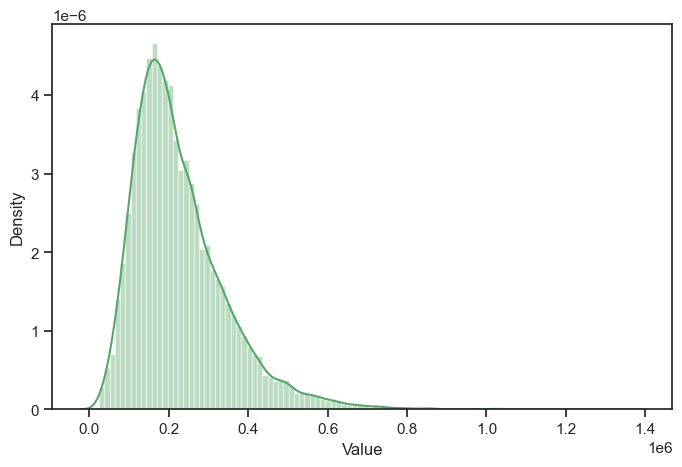

In [57]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Value'], color='g', bins=100, hist_kws = {'alpha': 0.4});

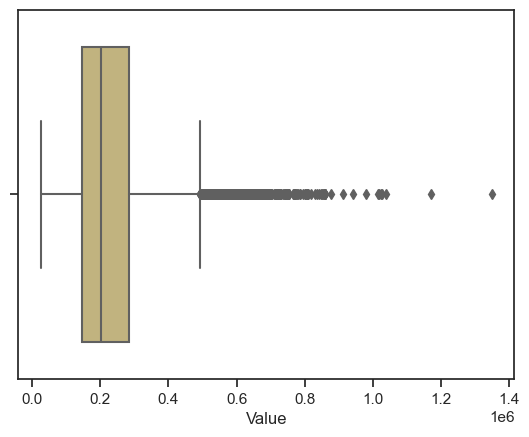

In [58]:
sns.boxplot(x = df['Value'], color="y")
plt.show()

It opted to not Scaling the original Value feature, there is no need at the moment.

In [59]:
from sklearn import preprocessing

In [60]:
df_scaled = df.copy()

In [61]:
df_scaled[['Value_scaled']] = preprocessing.scale(df_scaled[['Value']])

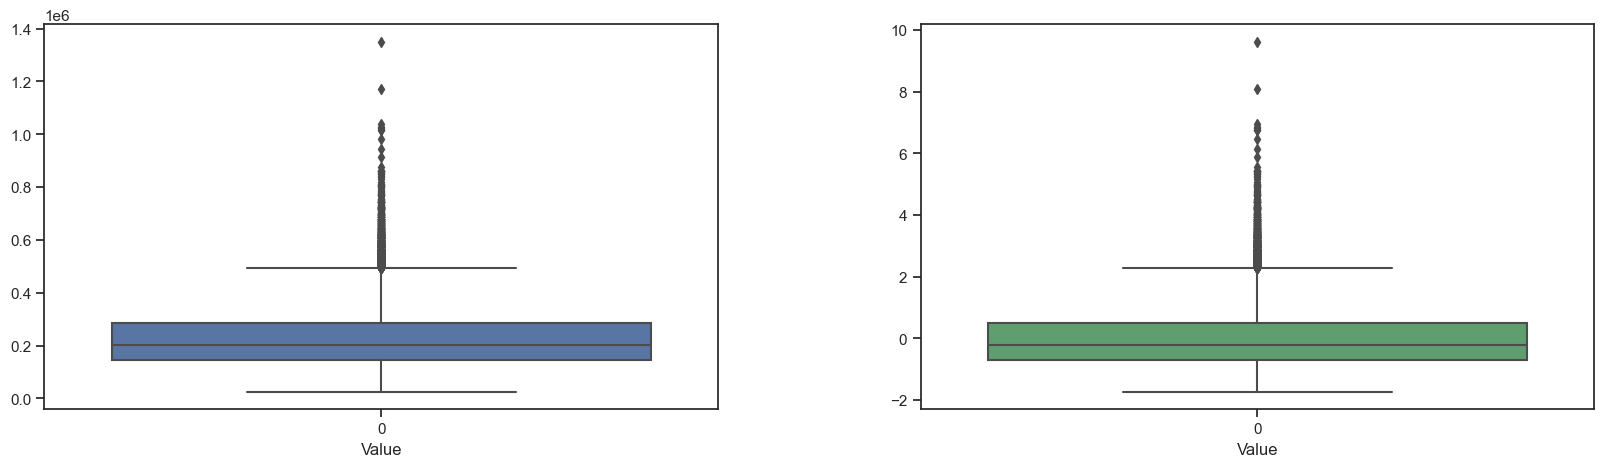

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

plt.subplots_adjust(wspace = 0.3) 

sns.boxplot(data = df['Value'], ax = ax[0], color = 'b',)
ax[0].set_xlabel('Value')
 
sns.boxplot(data = df_scaled['Value_scaled'], ax = ax[1], color='g')
ax[1].set_xlabel('Value')
    
plt.show()

### 2.13 Dealing Outliers

In [63]:
df_outliers = df_scaled.copy()

In [64]:
Q1 = df_outliers['Value'].quantile(0.25)
Q3 = df_outliers['Value'].quantile(0.75)
IQR = Q3 - Q1

In [65]:
df_outliers = df_outliers[~((df_outliers[['Value']] < (Q1 - 1.5 * IQR)) | 
                            (df_outliers[['Value']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
df_scaled.shape, df_outliers.shape

((23491, 8), (22703, 8))

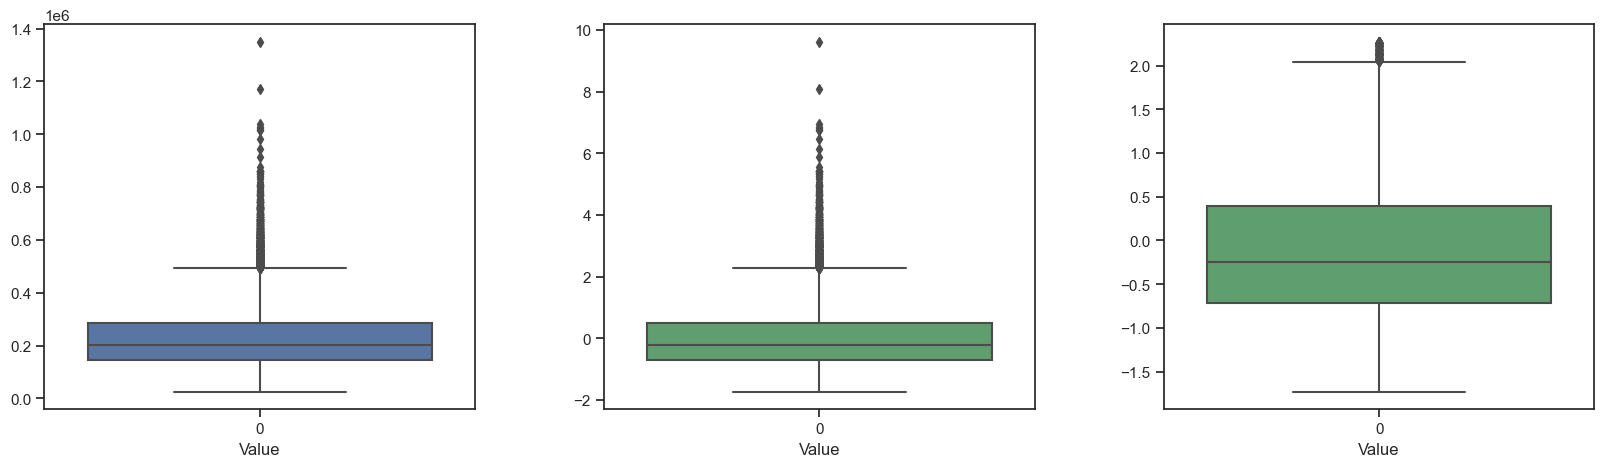

In [67]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

plt.subplots_adjust(wspace = 0.3) 

sns.boxplot(data = df['Value'], ax = ax[0], color = 'b',)
ax[0].set_xlabel('Value')
 
sns.boxplot(data = df_scaled['Value_scaled'], ax = ax[1], color='g')
ax[1].set_xlabel('Value')

sns.boxplot(data = df_outliers['Value_scaled'], ax = ax[2], color='g')
ax[2].set_xlabel('Value')
    
plt.show()

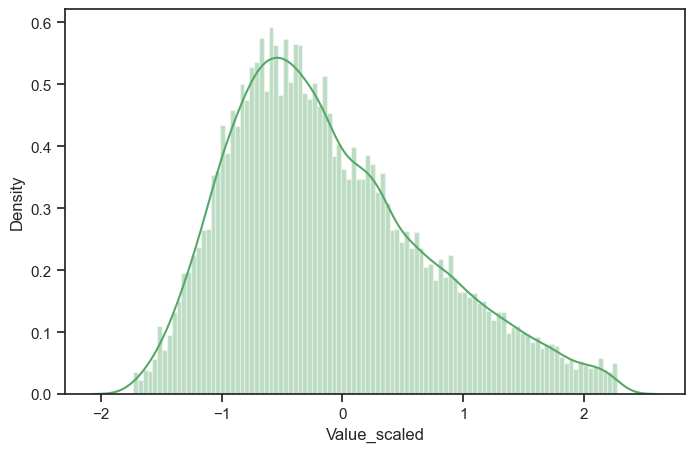

In [68]:
plt.figure(figsize = (8, 5))
sns.distplot(df_outliers['Value_scaled'], color='g', bins=100, hist_kws = {'alpha': 0.4});

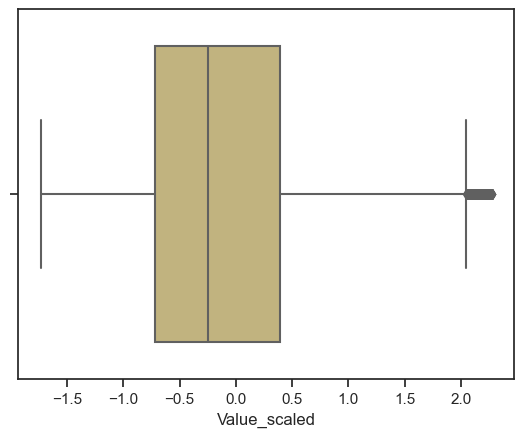

In [69]:
sns.boxplot(x = df_outliers['Value_scaled'], color="y")
plt.show()

## 3. Machine Learning

### 3.1 Principal Component Analysis (PCA)

In [70]:
df_machine = df_outliers.copy()

In [71]:
df_machine.head(2)

,Month,Eircode,Value,Acronym,County,Sold,County_encoder,Value_scaled
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0.0,0.815596
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,1.0,0.815596


In [72]:
# pip install mglearn

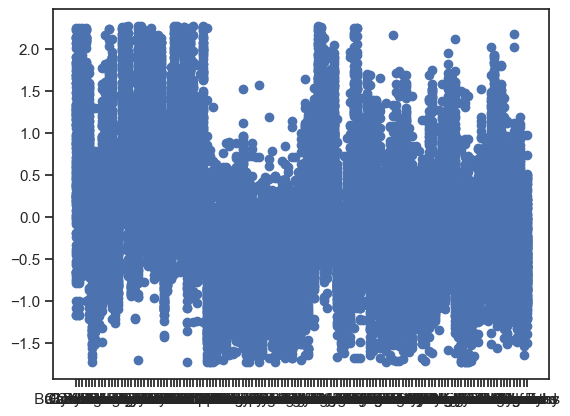

In [73]:
plt.scatter(df_machine['County'], df_machine['Value_scaled'])
plt.title('')
plt.show()

In [74]:
from sklearn.cluster import KMeans
kmeans_seeds = KMeans(n_clusters = 3)
kmeans_seeds.fit(df_machine.select_dtypes(include = ['number'])) 
C = kmeans_seeds.labels_
C.shape
assign_seeds = C.reshape(-1, 1)

In [75]:
# To plot the cluster data, consider two columns
X1 = df_machine['County']
X2 = df_machine['Value_scaled']

# Transform into numpy array
X11 = X1[:, ]
X22 = X2[:, ]

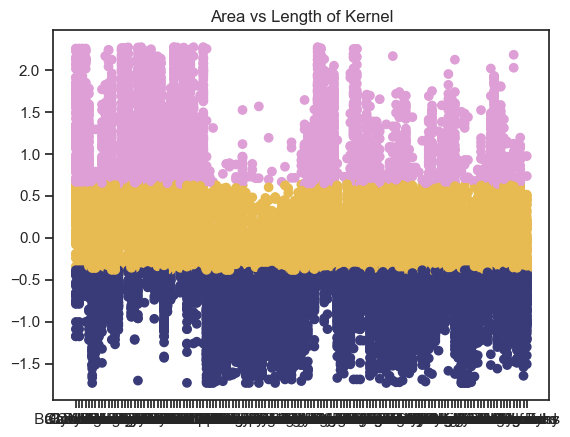

In [76]:
plt.scatter(X11, X22, c = assign_seeds, cmap = 'tab20b')
plt.title('Area vs Length of Kernel')
plt.show()

### 3.2 Linear Regression

In [77]:
df_machine.columns

Index(['Month', 'Eircode', 'Value', 'Acronym', 'County', 'Sold',
       'County_encoder', 'Value_scaled'],
      dtype='object')

In [78]:
X = df_machine['County_encoder']
X.head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: County_encoder, dtype: float64

In [79]:
y = df_machine['Value_scaled']
y.head()

0    0.815596
1    0.815596
2    0.815596
3    0.815596
4    0.995477
Name: Value_scaled, dtype: float64

In [80]:
X.shape, y.shape

((22703,), (22703,))

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , random_state = 100)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22703,), (22703,), (15892,), (6811,), (15892,), (6811,))

In [82]:
import numpy as np

X_train = X_train.to_numpy()[:, np.newaxis]
X_test = X_test.to_numpy()[:, np.newaxis]

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [84]:
print(lr.intercept_)
print(lr.coef_)

0.24028629720434708
[-0.00501859]


In [85]:
y_pred = lr.predict(X_test)

In [86]:
type(y_pred)

numpy.ndarray

Text(0, 0.5, 'Sales')

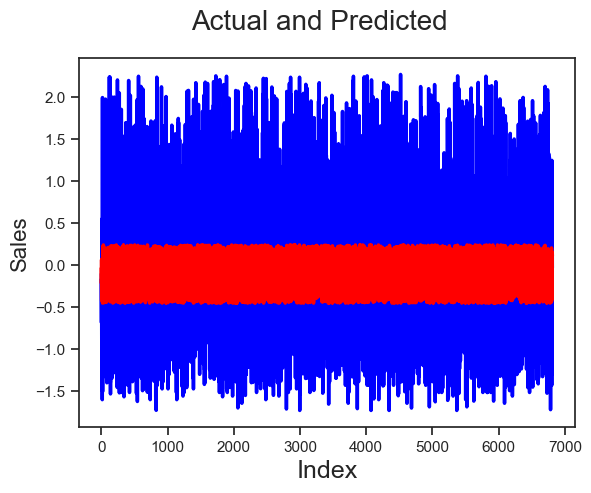

In [87]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,6812,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

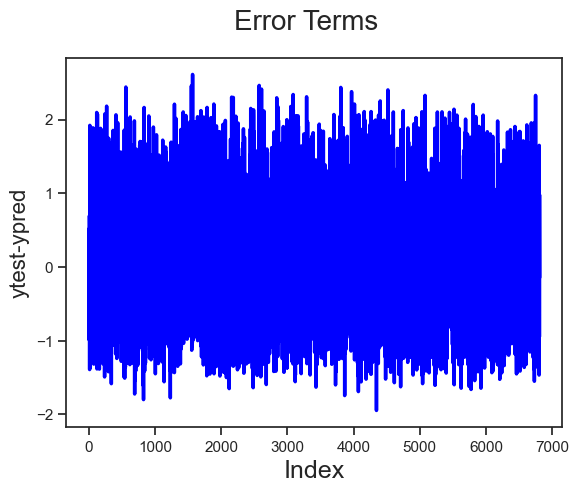

In [88]:
# Error terms
c = [i for i in range(1,6812,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [90]:
r_squared = r2_score(y_test, y_pred)

In [91]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.6283211236172185
r_square_value : 0.06403451172166053


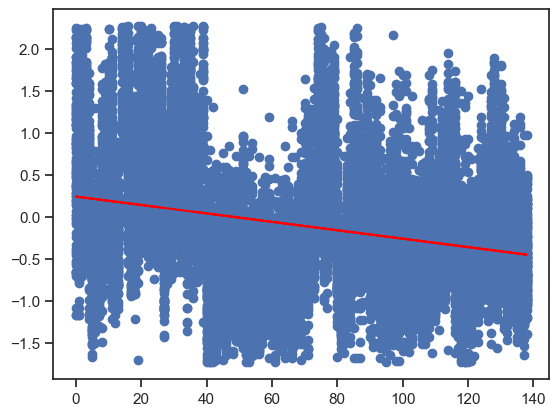

In [92]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

Learned how to use `.str.contains()` in an example of the www.geeksforgeeks.org website. In this case, it is "Using the contains() function of strings to filter the rows" to find just the observations that contains Dunlin in the name. (Sanchhaya Education Private Limited, 2021).

In [93]:
df[df['County'].str.contains('Dublin')]

,Month,Eircode,Value,Acronym,County,Sold,County_encoder
18,2010 January,D01: Dublin 1,212500.0,D01,Dublin 1,0,18.0
19,2010 January,D02: Dublin 2,232688.0,D02,Dublin 2,0,19.0
20,2010 January,D03: Dublin 3,344300.0,D03,Dublin 3,0,20.0
21,2010 January,D04: Dublin 4,372500.0,D04,Dublin 4,0,21.0
22,2010 January,D05: Dublin 5,291000.0,D05,Dublin 5,0,22.0
...,...,...,...,...,...,...,...
23387,2024 January,D18: Dublin 18,548727.0,D18,Dublin 18,0,35.0
23388,2024 January,D20: Dublin 20,368400.0,D20,Dublin 20,0,36.0
23389,2024 January,D22: Dublin 22,502539.0,D22,Dublin 22,0,37.0
23390,2024 January,D24: Dublin 24,377731.0,D24,Dublin 24,0,38.0


In [94]:
dublin = df['County'][df['County'].str.contains('Dublin')].unique()

In [95]:
print(dublin)

[' Dublin 1' ' Dublin 2' ' Dublin 3' ' Dublin 4' ' Dublin 5' ' Dublin 6'
 ' Dublin 7' ' Dublin 8' ' Dublin 9' ' Dublin 10' ' Dublin 11'
 ' Dublin 12' ' Dublin 13' ' Dublin 14' ' Dublin 15' ' Dublin 16'
 ' Dublin 17' ' Dublin 18' ' Dublin 20' ' Dublin 22' ' Dublin 24'
 ' Dublin 6W']


In [96]:
# sns.kdeplot(
#    data = df, x = "Value", hue=dublin,
#    fill = True, common_norm=False, palette="crest",
#    alpha=.5, linewidth=0,
# )

---

## Conclusions

Old dataset
- Statistic - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- Dwelling Status - 1: All Dwelling Statuses, 2: New and 3: Existing
- Stamp Duty Event - 1: Filings and 2: Executions
- Type of Buyer - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

---

## Data Dictionary

**Statistic_Label**
- Mean Sale Price: Mean Sale Price (Euro)

**Month**
- Rage from 2010 January to 2024 January

**Dwelling Status -> Dwelling_Status**
- All Dwelling Statuses

**Eircode Output -> Eircode**
- Eircodes

**Stamp Duty Event** 
- Executions

**Type of Buyer -> Type_Buyer** 
- Household Buyer - First-Time Buyer Owner-Occupier

**UNIT**
- Euro

**VALUE -> Value**
Price of the property

---
**New Columns**
- **Acronym** County Acronym
- **County** County Name
- **Eir_encoder** Eircodes encoded 

---

## References

Müller, A.C. and Guido, S. (2017). Introduction to Machine Learning with Python: A guide for Data Scientists. Beijing: O’reilly.

The Pandas Development Team (2024a). How do I select a subset of a DataFrame? — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html.

The Pandas Development Team (2024b). pandas.Series.str.split — pandas 1.3.0 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html.